In [1]:
import numpy as np, matplotlib.pyplot as plt, librosa as lr
from IPython.display import Audio

# window function effect

Hanning window:

$w[n] = a_0 - (1 - a_0) \cdot \cos \left({\tfrac {2 \pi n}{N}}\right),
\newline 0\leq n\leq N, \ a_0 = 0.5$

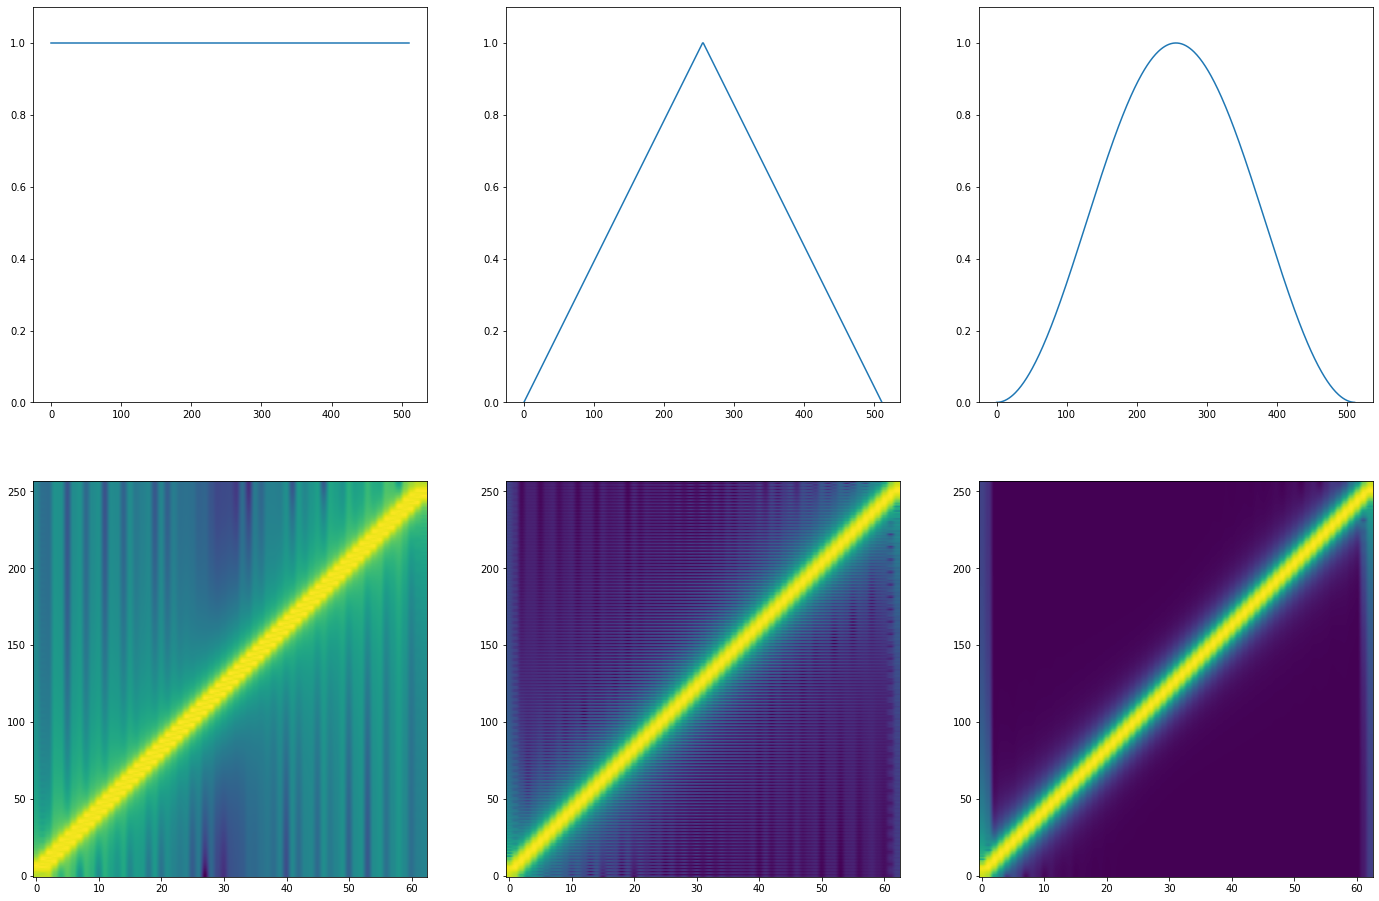

In [2]:
sr = 4000
length = 2 # sec
n_samples = int(sr * length)
freq = np.linspace(20, 1000, n_samples)
t = np.linspace(0, length, n_samples)
y_sweep = np.sin(t * 2 * np.pi * freq)
win_length = 512

w_rect = np.ones(win_length)
w_tri = np.concatenate([np.linspace(0, 1, win_length // 2),
                        np.linspace(1, 0, win_length // 2)])

a_0 = 0.5
w_hann = a_0 - (1 - a_0) * np.cos((2 * np.pi * np.arange(win_length)) / win_length)

stft_rect = lr.stft(y_sweep, n_fft=win_length, window=w_rect)
stft_tri = lr.stft(y_sweep, n_fft=win_length, window=w_tri)
stft_hann = lr.stft(y_sweep, n_fft=win_length, window=w_hann)

gamma = 1000


plt.figure(figsize=(24, 16))

plt.subplot(2, 3, 1)
plt.plot(w_rect)
plt.ylim(0, 1.1)

plt.subplot(2, 3, 2)
plt.plot(w_tri)
plt.ylim(0, 1.1)

plt.subplot(2, 3, 3)
plt.plot(w_hann)
plt.ylim(0, 1.1)

plt.subplot(2, 3, 4)
plt.imshow(np.log10(1 + np.abs(stft_rect) * gamma), origin='lower', aspect='auto')

plt.subplot(2, 3, 5)
plt.imshow(np.log10(1 + np.abs(stft_tri) * gamma), origin='lower', aspect='auto')

plt.subplot(2, 3, 6)
plt.imshow(np.log10(1 + np.abs(stft_hann) * gamma), origin='lower', aspect='auto')

# plt.colorbar()

display(Audio(y_sweep, rate=sr))

# log-gamma compression

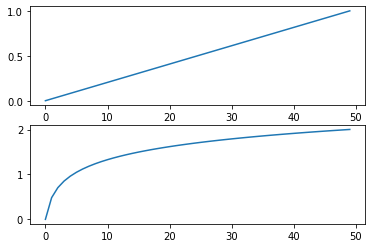

In [3]:
gamma = 100

y_ramp = np.linspace(0, 1)

y_c = np.log10(1 + y_ramp * gamma)

plt.subplot(2, 1, 1)
plt.plot(y_ramp)

plt.subplot(2, 1, 2)
plt.plot(y_c)

# window size effect

In [4]:
freq1 = 500
freq2 = 540
sr = 8000
length = 1
n_samples = int(sr * length)

t = np.linspace(0, length, n_samples)

y_win = (np.sin(t * 2 * np.pi * freq1) * 0.5) + (np.sin(t * 2 * np.pi * freq2) * 0.5)

display(Audio(y_win, rate=sr))

y_win_ = y_win * 0.25
y_win_[3920] = 1
y_win_[4080] = 1

display(Audio(y_win_, rate=sr))

win-length:	32
hop-length:	32


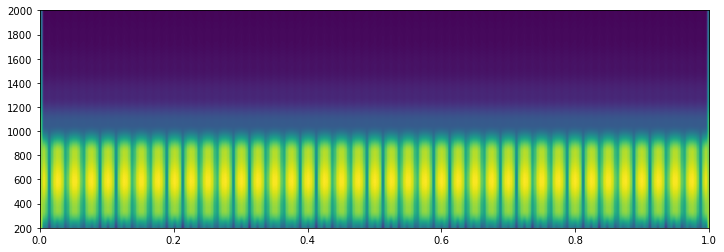

win-length:	32
hop-length:	16


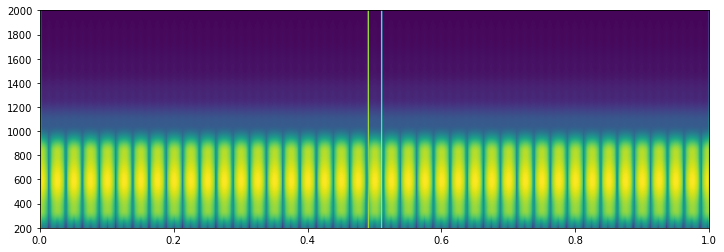

win-length:	32
hop-length:	8


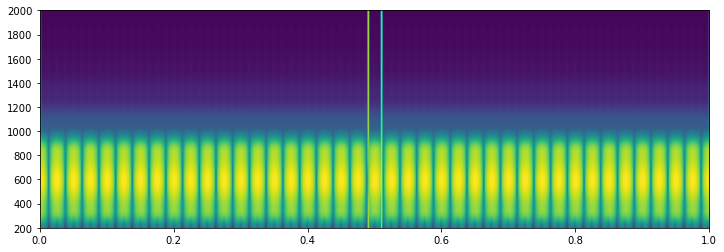

win-length:	32
hop-length:	4


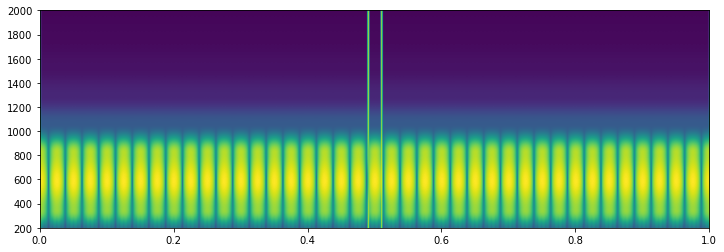

win-length:	32
hop-length:	2


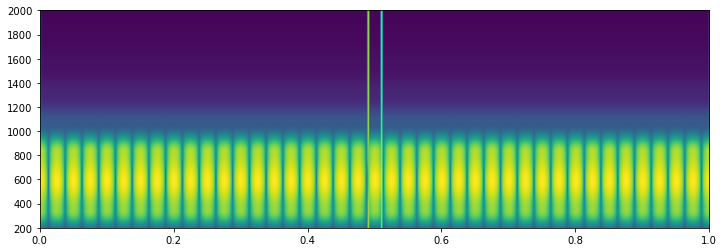

win-length:	32
hop-length:	1


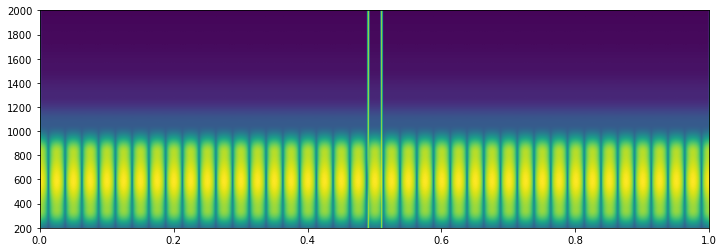

win-length:	32
hop-length:	1


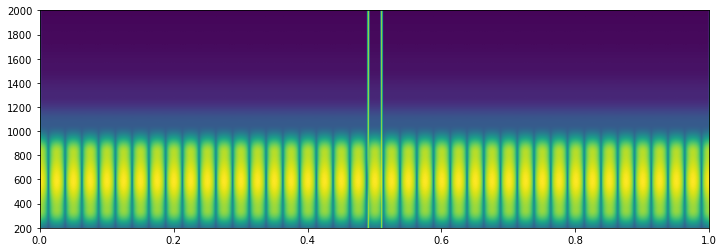

win-length:	32
hop-length:	1


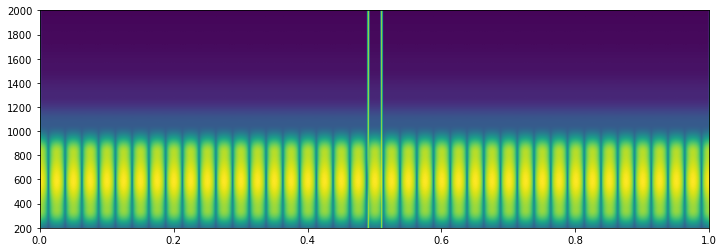

win-length:	64
hop-length:	64


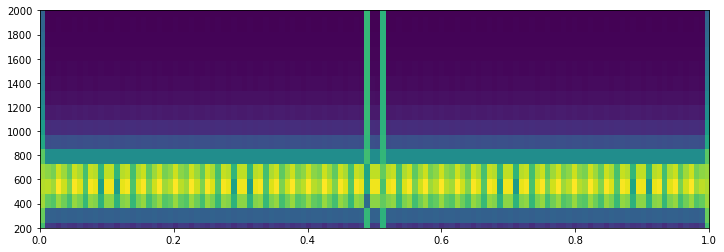

win-length:	64
hop-length:	32


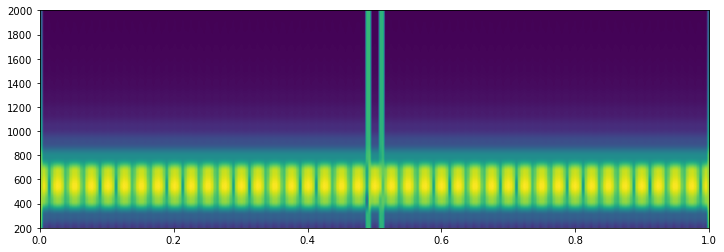

win-length:	64
hop-length:	16


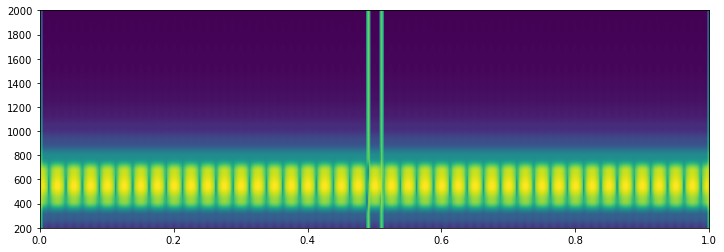

win-length:	64
hop-length:	8


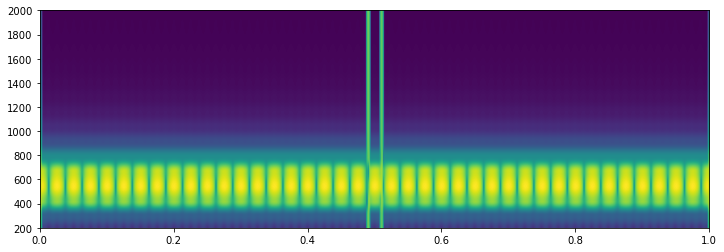

win-length:	64
hop-length:	4


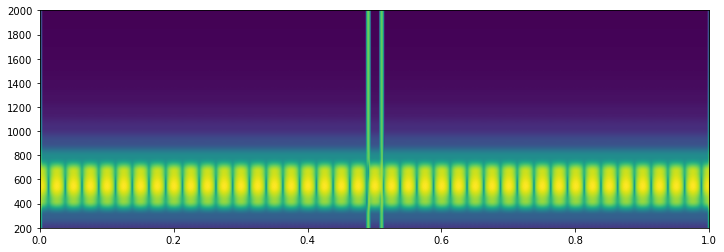

win-length:	64
hop-length:	2


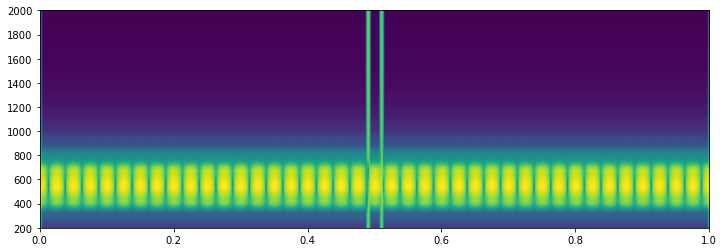

win-length:	64
hop-length:	1


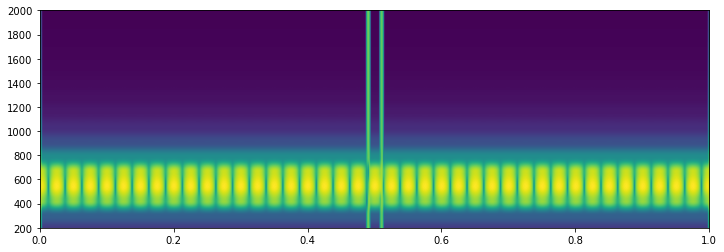

win-length:	64
hop-length:	1


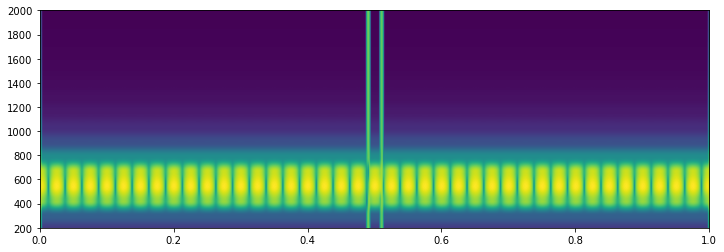

win-length:	128
hop-length:	128


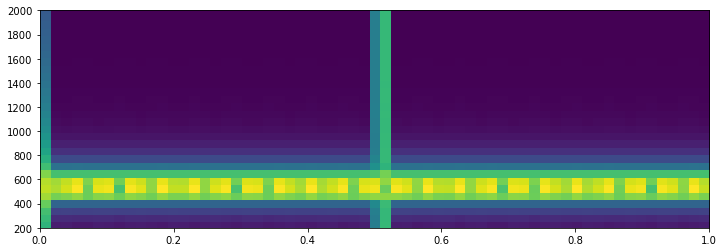

win-length:	128
hop-length:	64


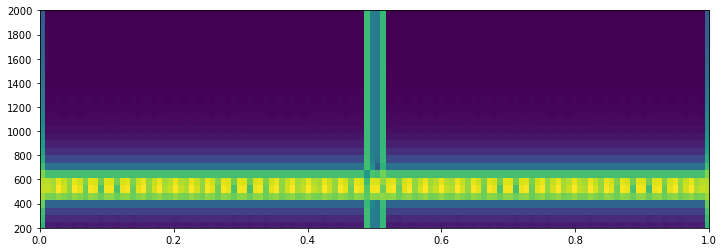

win-length:	128
hop-length:	32


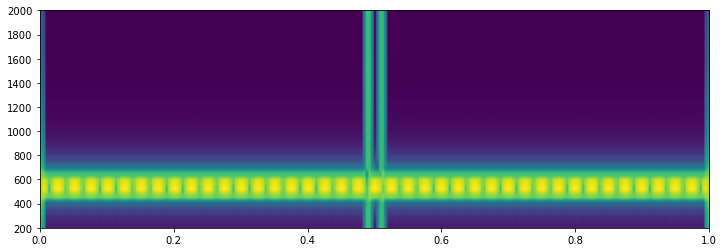

win-length:	128
hop-length:	16


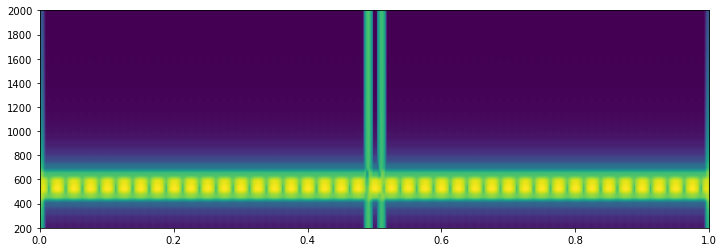

win-length:	128
hop-length:	8


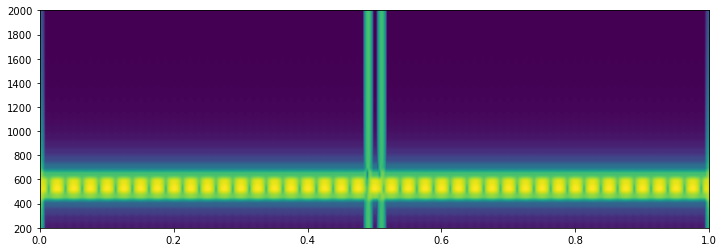

win-length:	128
hop-length:	4


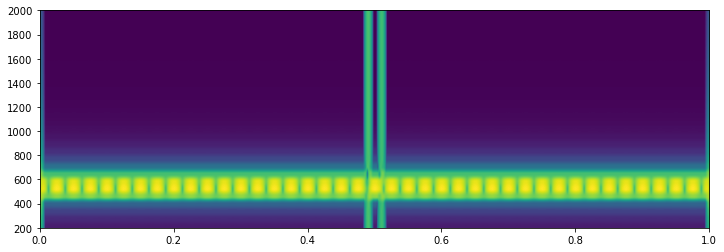

win-length:	128
hop-length:	2


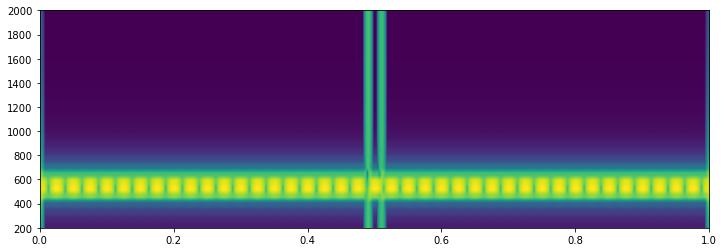

win-length:	128
hop-length:	1


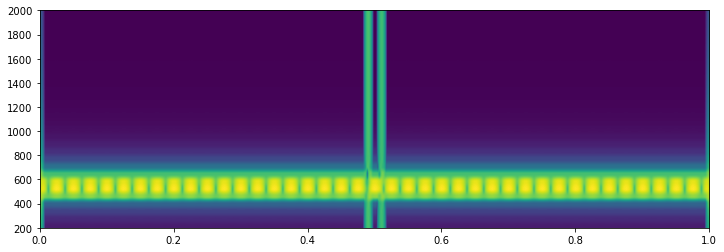

win-length:	256
hop-length:	256


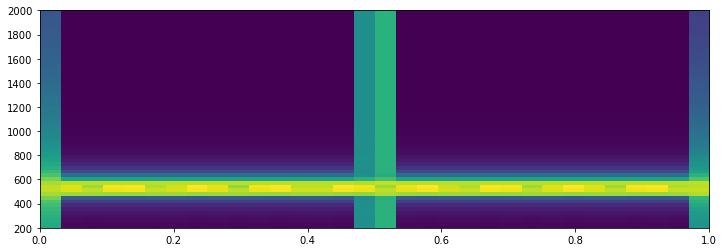

win-length:	256
hop-length:	128


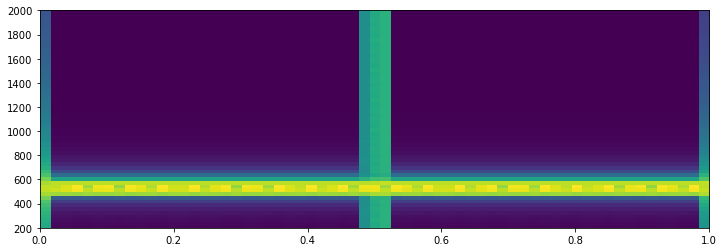

win-length:	256
hop-length:	64


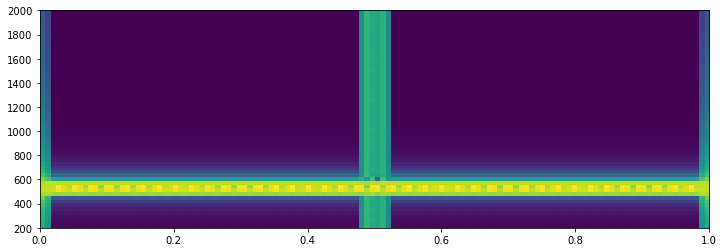

win-length:	256
hop-length:	32


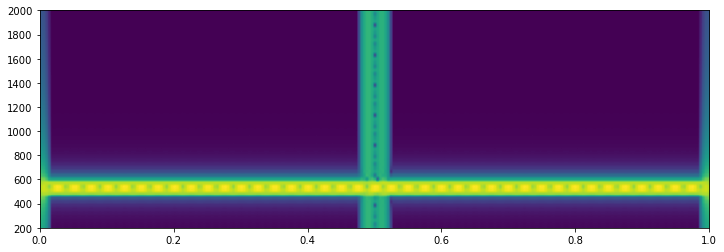

win-length:	256
hop-length:	16


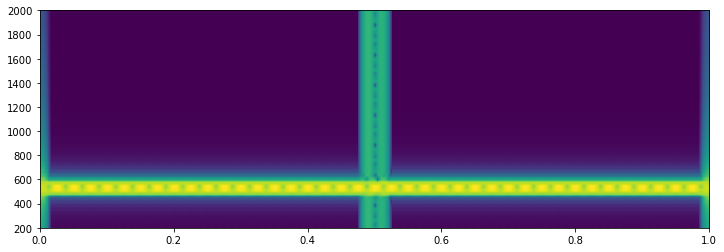

win-length:	256
hop-length:	8


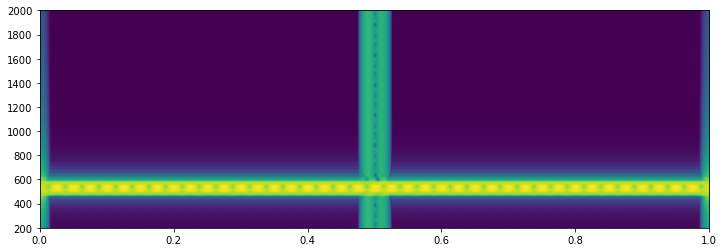

win-length:	256
hop-length:	4


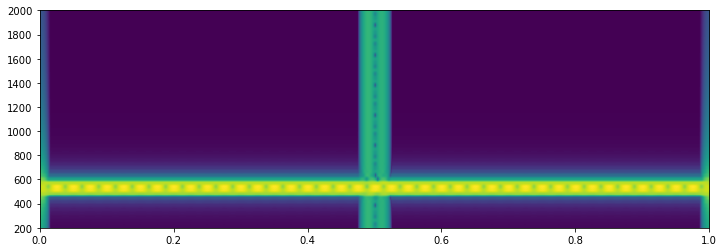

win-length:	256
hop-length:	2


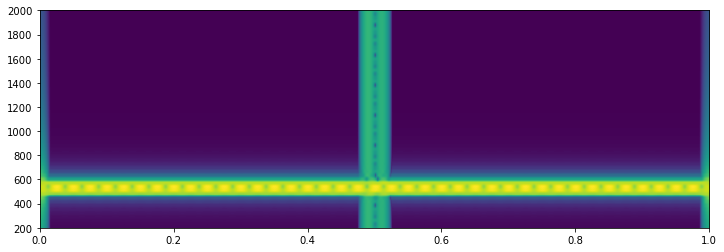

win-length:	512
hop-length:	512


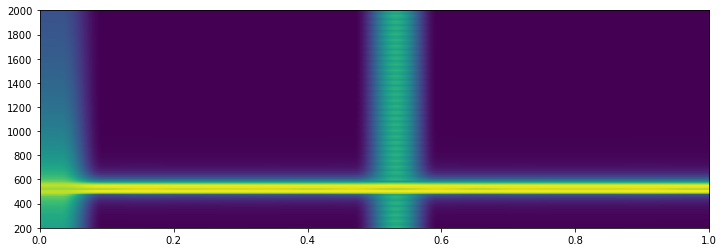

win-length:	512
hop-length:	256


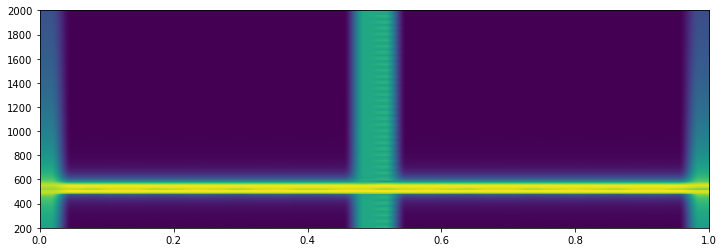

win-length:	512
hop-length:	128


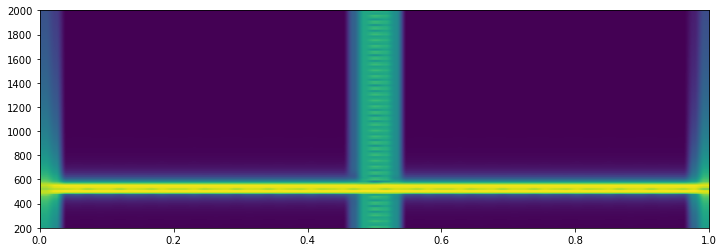

win-length:	512
hop-length:	64


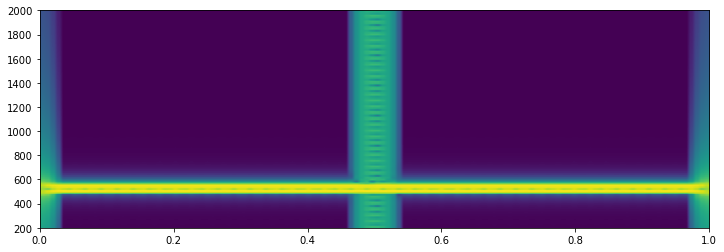

win-length:	512
hop-length:	32


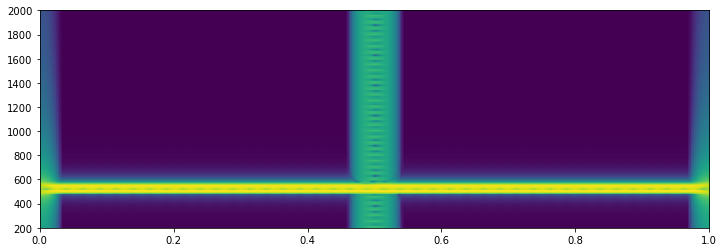

win-length:	512
hop-length:	16


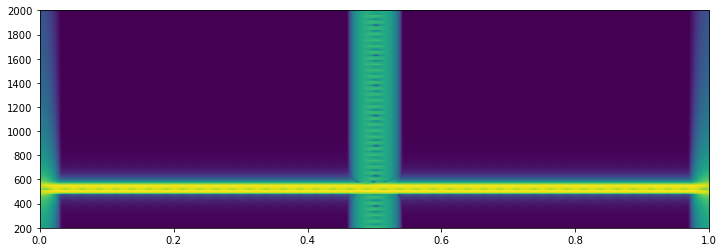

win-length:	512
hop-length:	8


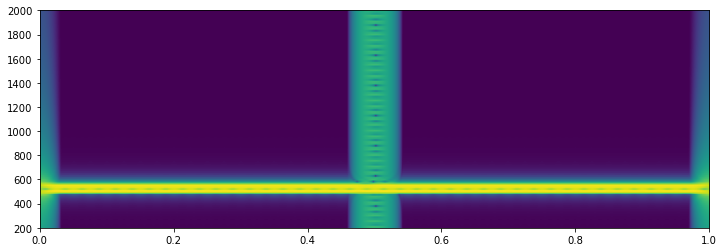

win-length:	512
hop-length:	4


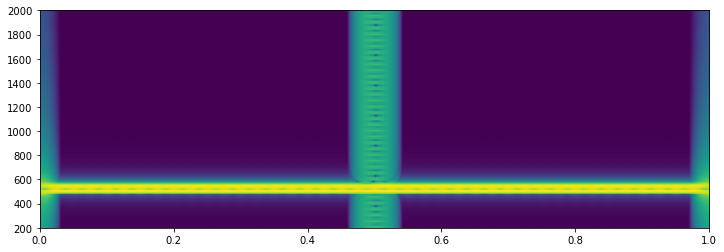

win-length:	1024
hop-length:	1024


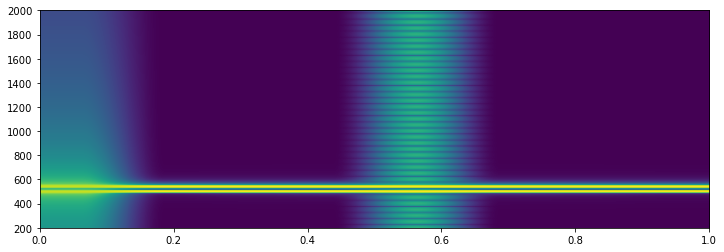

win-length:	1024
hop-length:	512


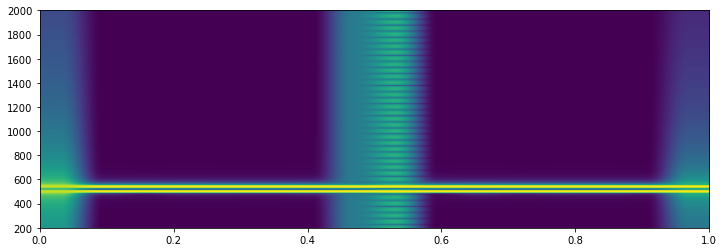

win-length:	1024
hop-length:	256


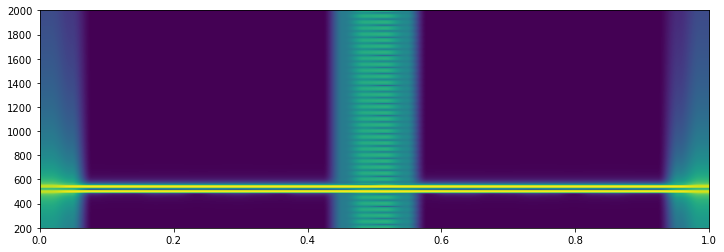

win-length:	1024
hop-length:	128


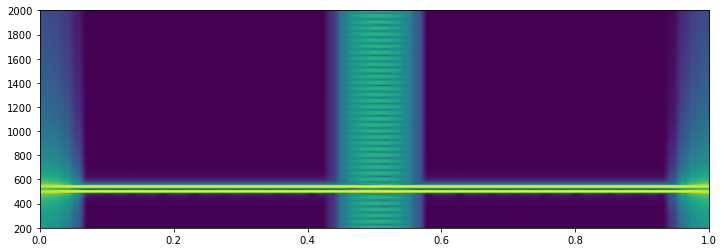

win-length:	1024
hop-length:	64


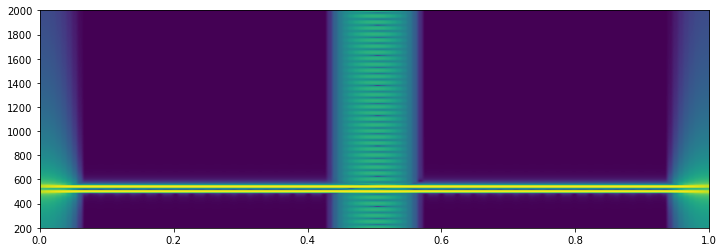

win-length:	1024
hop-length:	32


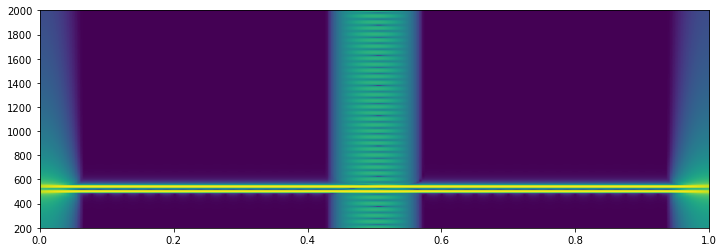

win-length:	1024
hop-length:	16


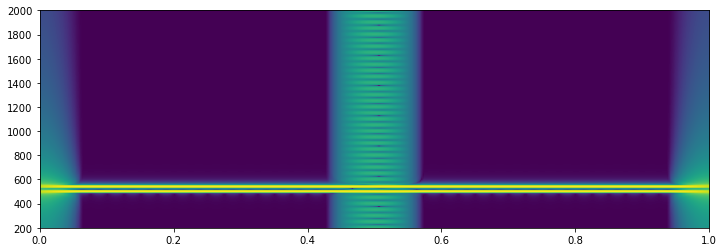

win-length:	1024
hop-length:	8


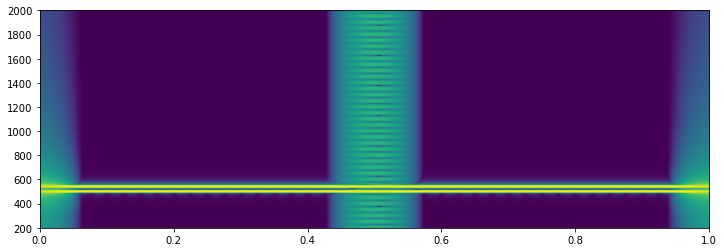

win-length:	2048
hop-length:	2048


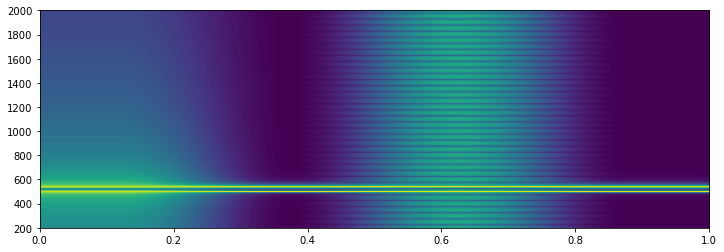

win-length:	2048
hop-length:	1024


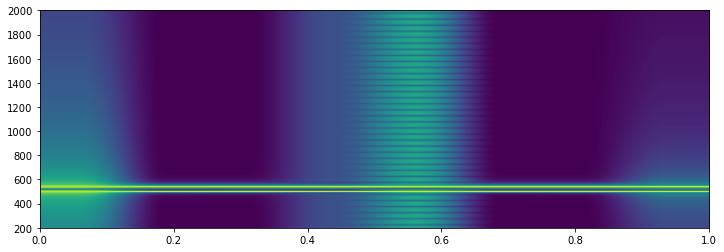

win-length:	2048
hop-length:	512


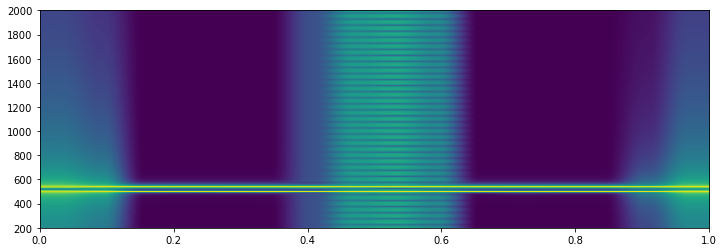

win-length:	2048
hop-length:	256


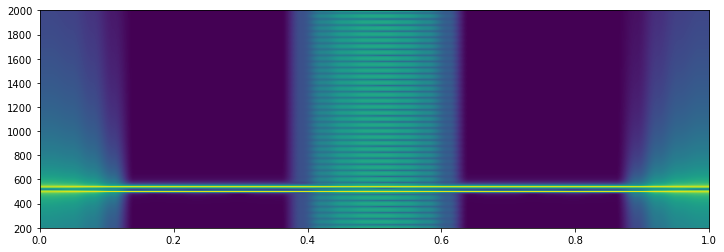

win-length:	2048
hop-length:	128


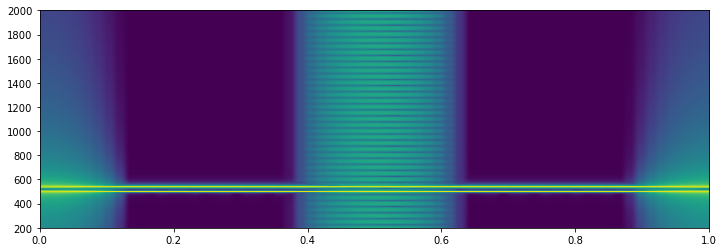

win-length:	2048
hop-length:	64


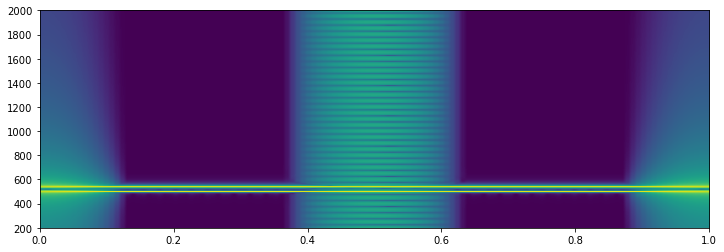

win-length:	2048
hop-length:	32


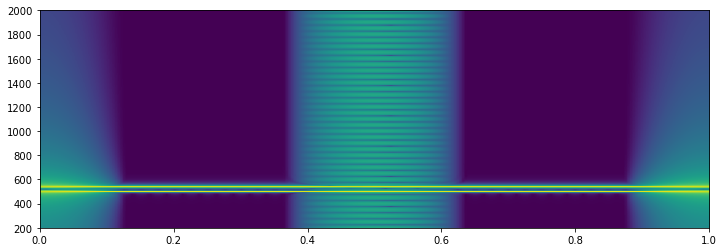

win-length:	2048
hop-length:	16


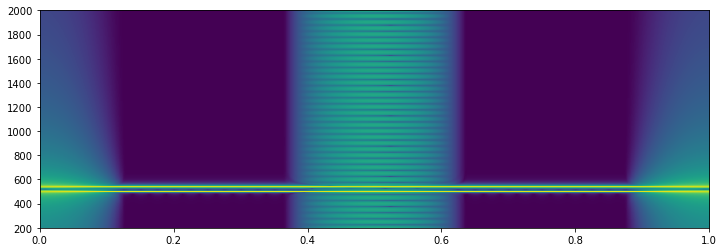

win-length:	4096
hop-length:	4096


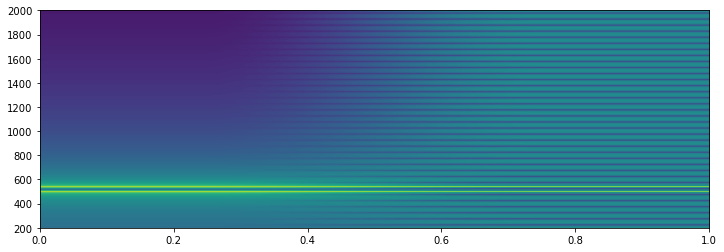

win-length:	4096
hop-length:	2048


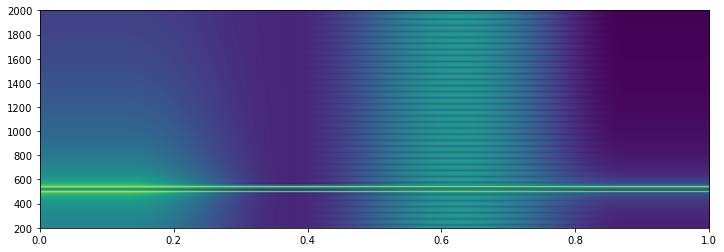

win-length:	4096
hop-length:	1024


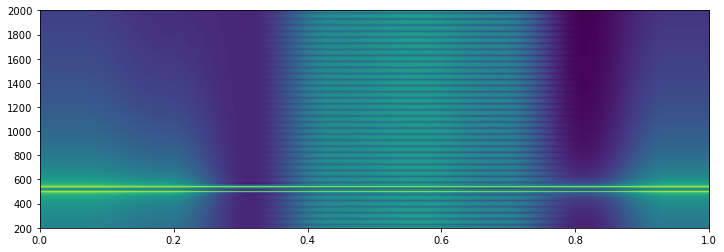

win-length:	4096
hop-length:	512


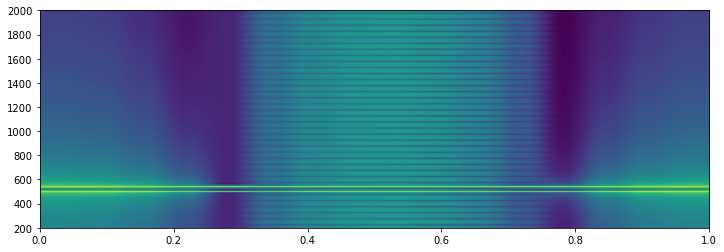

win-length:	4096
hop-length:	256


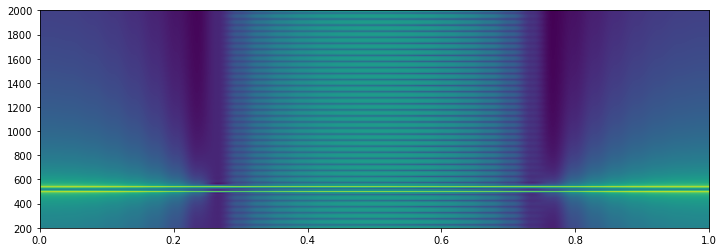

win-length:	4096
hop-length:	128


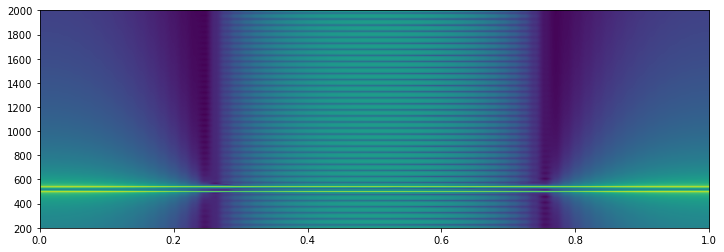

win-length:	4096
hop-length:	64


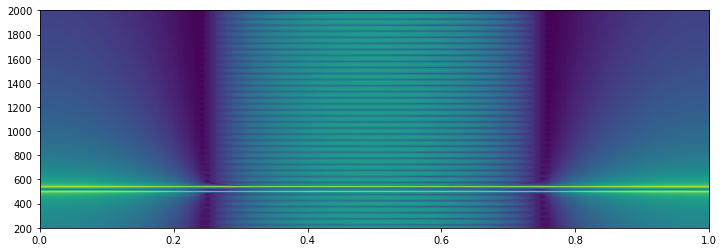

win-length:	4096
hop-length:	32


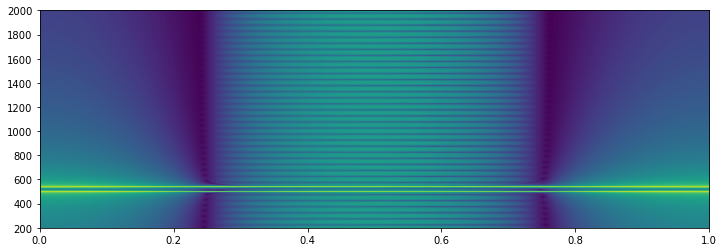

In [5]:
window_lengths = 2 ** np.arange(5, 13)

for window_length in window_lengths:

    hop_lengths = window_length // np.array([1, 2, 4, 8, 16, 32, 64, 128])

    for hop_length in hop_lengths:
        
        hop_length = np.max([1, hop_length])
        
        stft = lr.stft(y_win_, n_fft=window_length, hop_length=hop_length)

        print('win-length:\t%i\nhop-length:\t%i' % (window_length, hop_length))

        gamma = 100

        plt.figure(figsize=(12, 4))
        plt.imshow(np.log10(1 + np.abs(stft) * gamma), origin='lower', aspect='auto',
                   extent=[0, length, 0, sr / 2])
        plt.ylim(200, 2000)
        plt.show()